In [3]:
import numpy

In [7]:
!pip install scikit-learn
!pip install seaborn
!pip install tensorflow
!pip install pickle


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\oshim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\oshim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     -------------------------------------- 276.5/276.5 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ------------------------------------- 430.5/430.5 kB 26.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 17.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 22.9 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 14.2 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.8 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 14.8 MB/s eta 0:00:00
     ---------------------------------------- 64.8/64.8 kB 


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\oshim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

Import data 


In [37]:
import pandas as pd 
data=pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Explore data


In [38]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [48]:
x=data.iloc[:,[3,4]].values
x #annual income and spending score in the form of arrays


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#performing elbow method
#Using Kmeans to iterate from 1-11 clusters adn plotting a elbow plot 
#deciding optimal number of clusters to be used 
#elbow method is fundamental step for unsupersvised learning to determine optimal number of clusters
#k-mean groups in clusters of same charactericsts k=3 means 3 clusters

In [49]:
from sklearn.cluster import KMeans
wcss=[] # sum of squared distance between each point and centroid in cluster, it increases with decreases in clusters


In [50]:
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0) #init=k-means++ it means kmeans choose smarter initialization of centroid andimproves quality of cluster

    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #kmeans.inertia_ use to segregate data points into cluster
    

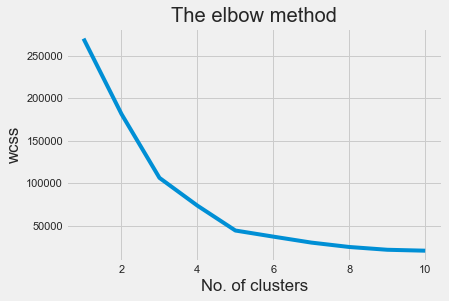

In [51]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()



In [ ]:
#in the above graph we can see that elbow is around K=5 which can be optimal clusters  

Training model K-Means

#initializing our Kmeans model with selected optimal No. of clusters
#plot of clusters and gain intuition regarding our customers

In [52]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)


In [55]:
y_kmeans=kmeansmodel.fit_predict(x)

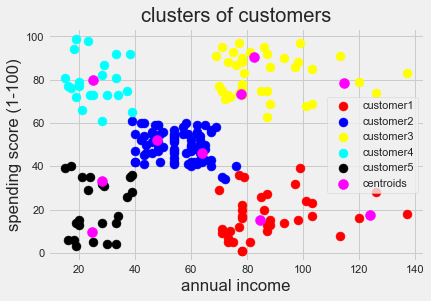

In [56]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80 , c='red' , label='customer1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80 , c='blue' , label='customer2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80 , c='yellow' , label='customer3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80 , c='cyan' , label='customer4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80 , c='black' , label='customer5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='magenta', label='centroids')
plt.title('clusters of customers')
plt.xlabel('annual income')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()